In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

### Problem Statement
The goal of this project is to predict customer churn in a telecom company.
Customer churn refers to customers who stop using the company's services.
By analyzing customer demographics, service usage, contract details, and charges,
we aim to identify patterns that indicate whether a customer is likely to churn.

### What is Customer Churn?
Customer churn occurs when a customer stops doing business with a company.
Reducing churn is important because retaining existing customers is generally
more cost-effective than acquiring new ones.

### Dataset Overview
This dataset contains customer-level information from a telecom company,
including demographic details, subscribed services, contract type, billing
information, and churn status.

# Phase 1 - Load the dataset 

### What I did
Loaded the Telco Customer Churn dataset using pandas.

### Why I did it
To begin exploring the dataset and understand its structure before any cleaning or analysis.

### What I observed
The dataset loaded successfully.


In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

### What I did
Displayed the first five rows of the dataset.

### Why I did it
To get a quick overview of the columns and sample values.

### What I observed
The dataset contains a mix of categorical and numerical columns related to customer details, services, and billing.

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### What I did
Checked the shape of the dataset.

### Why I did it
To understand how many rows (customers) and columns (features) are present.

### What I observed
The dataset contains several thousand customer records and multiple feature columns.

In [4]:
df.shape

(7043, 33)

### What I did
Inspected data types and non-null counts using df.info().

### Why I did it
To identify which columns are categorical, which are numerical, and whether any columns contain missing values or incorrect data types.

### What I observed
Some columns are categorical (object type), while others are numerical.
A few columns may require data type conversion or missing value handling later.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Phase 2 - Column Grouping

### Target Variable
The target variable for this project is **Churn Label**, which indicates
whether a customer has churned or not.
This is a binary classification problem.

### Columns to Drop
These columns are identifiers, geographic details, or contain information
that would not be available at prediction time, leading to data leakage
or unnecessary noise.

### Categorical Features
These columns represent customer demographics, service subscriptions,
and contract or payment choices.
They will require encoding at a later stage.

### Numerical Features
These columns represent duration, charges, or customer value
and may require scaling or transformation later.

# Phase 3 - Minimal Cleaning

### What I did
Dropped identifier, geographic, and leakage-related columns from the dataset.

### Why I did it
These columns do not contribute to predicting churn and may introduce noise
or data leakage if used during modeling.

### What I observed
The dataset now contains only relevant features for churn analysis.

In [6]:
drop_cols = [
    "CustomerID", "Count", "Country", "State", "City",
    "Zip Code", "Latitude", "Longitude", "Lat Long",
    "Churn Value", "Churn Score", "Churn Reason"
]

df = df.drop(columns=drop_cols)

### What I did
Verified the shape and column names after dropping unnecessary columns.

### Why I did it
To ensure that only the intended columns were removed and no important
features were accidentally dropped.

### What I observed
The number of columns reduced, and all remaining columns are relevant
to customer behavior or churn.

In [7]:
df.shape 

(7043, 21)

In [8]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'CLTV'],
      dtype='object')

### What I did
Converted the `Total Charges` column from text to numeric format.

### Why I did it
Although `Total Charges` represents numerical data, it was stored as text.
Converting it to numeric ensures accurate calculations and visualizations.

### What I observed
Some values were converted to missing values (NaN), indicating blank or
invalid entries in the original data.


In [9]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors= 'coerce')

### What I did
Verified the data type and checked for missing values in `Total Charges`.

### Why I did it
To confirm that the conversion was successful and to identify how many
missing values were introduced during the process.

### What I observed
The column is now numeric, and a small number of missing values are present.

In [10]:
df['Total Charges'].dtype

dtype('float64')

In [11]:
df['Total Charges'].isnull().sum()

np.int64(11)

### What I did
Removed leading and trailing spaces from all categorical columns.

### Why I did it
Extra spaces can cause identical categories to be treated as different values
during analysis and encoding.

### What I observed
Categorical values are now consistently formatted.

In [12]:
categorical_columns = df.select_dtypes(include= 'object').columns

for col in categorical_columns: 
    df[col] = df[col].str.strip()

### What I did
Standardized service-related categorical values by replacing system-generated
labels with consistent customer decision labels.

### Why I did it
Values such as "No internet service" do not represent separate customer
choices and can artificially increase category count.

### What I observed
Service-related columns now contain only meaningful categories.

In [13]:
service_cols = [
    "Multiple Lines",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies"
]

for col in service_cols:
    df[col] = df[col].replace({
        "No internet service": "No",
        "No phone service": "No"
    })

### What I did
Verified unique values in service-related columns.

### Why I did it
To ensure that categorical standardization was applied correctly.

### What I observed
All service-related columns are now binary and consistent.

In [16]:
for col in service_cols: 
    print(df[col].unique())

['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


# Phase 4 - EDA (Exploratory Data Analysis)

### What I did
Plotted the distribution of the target variable (Churn Label).

### Why I did it
To understand whether the dataset is balanced or imbalanced.

### What I observed
The dataset shows an imbalance between churned and non-churned customers,
with more customers not churning than churning.


Text(0.5, 1.0, 'Churn Distribution')

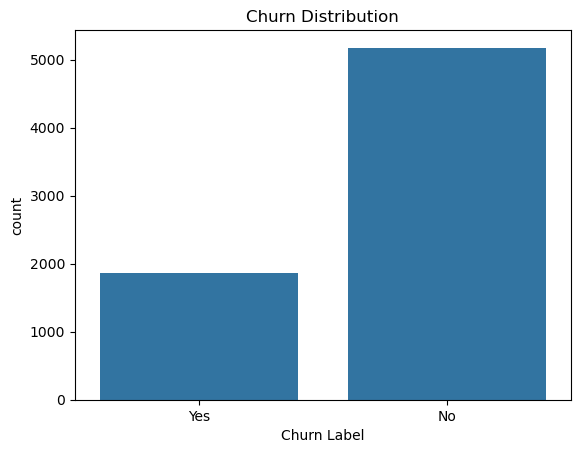

In [17]:
sns.countplot(x="Churn Label", data=df)
plt.title("Churn Distribution")

# Tenure VS Churn

### What I did
Visualized the distribution of tenure for churned and non-churned customers.

### Why I did it
To analyze whether customer tenure has an impact on churn behavior.

### What I observed
Customers with lower tenure tend to churn more frequently compared to
longer-tenure customers.

Text(0.5, 1.0, 'Tenure vs Churn')

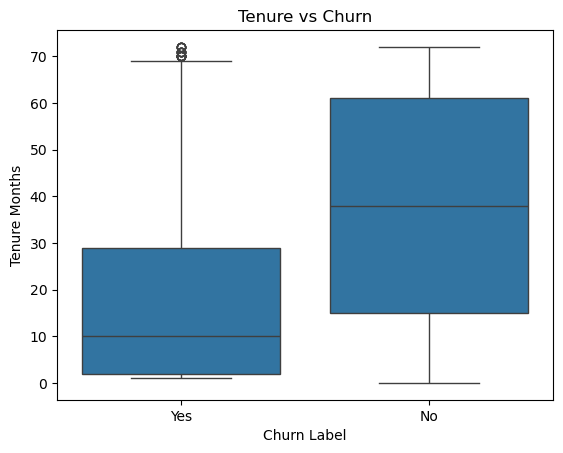

In [18]:
sns.boxplot(x="Churn Label", y="Tenure Months", data=df)
plt.title("Tenure vs Churn")

### What I did
Analyzed churn distribution across different contract types.

### Why I did it
Contract duration can influence customer commitment and churn probability.

### What I observed
Month-to-month contracts show higher churn compared to one-year and two-year
contracts.

([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'Two year'),
  Text(2, 0, 'One year')])

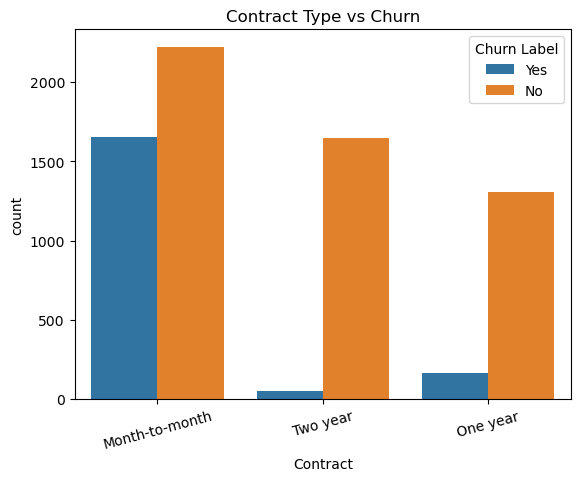

In [19]:
sns.countplot(x="Contract", hue="Churn Label", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)

### What I did
Compared monthly charges between churned and non-churned customers.

### Why I did it
To understand whether pricing plays a role in customer churn.

### What I observed
Customers with higher monthly charges tend to show a higher likelihood of churn.

Text(0.5, 1.0, 'Monthly Charges vs Churn')

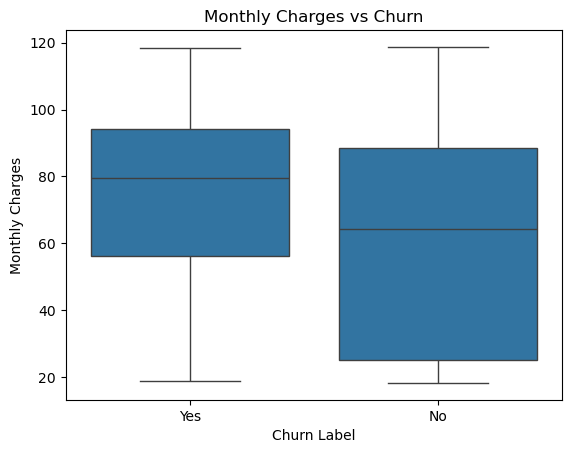

In [20]:
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")

### Key Insight from EDA
Customer tenure shows a strong inverse relationship with churn.
Customers with lower tenure are significantly more likely to churn,
indicating that early-stage customers are the highest risk group.

# Phase 5 - Final Cleaning And Feature Engineering

### What I did
Filled missing values in `Total Charges` with 0.

### Why I did it
Missing values correspond to new customers with very low or zero tenure,
so their total charges are effectively zero.

### What I observed
All missing values in `Total Charges` were resolved.

In [21]:
df['Total Charges'] = df['Total Charges'].fillna(0)

### What I did
Created a new feature called `Avg Monthly Spend`.

### Why I did it
Total Charges depends heavily on tenure.
Average Monthly Spend provides a normalized view of customer spending
independent of how long they have been with the company.

### What I observed
The new feature better represents customer spending behavior.


In [22]:
df['Average Monthly Spend'] = df['Total Charges'] / df['Tenure Months'].replace(0, 1)

### What I did
Binned customer tenure into meaningful groups.

### Why I did it
Tenure groups make patterns easier to interpret and allow models
to capture non-linear churn behavior.

### What I observed
Early tenure groups show higher churn risk compared to long-term customers.

In [23]:
df["Tenure Group"] = pd.cut(
    df["Tenure Months"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1 year", "1-2 years", "2-4 years", "4-6 years"]
)

# Phase 6 - Encoding And Modeling

### What I did
Separated features and target variable.

### Why I did it
Machine learning models require input features (X) and a target (y).

### What I observed
The dataset is now ready for preprocessing and model training.

In [24]:
X = df.drop(columns= ['Churn Label'])
Y = df['Churn Label']

In [29]:
print(f'Features are {X.info()} \n\n\n')
print(f'Target Variable is {Y.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gender                 7043 non-null   object  
 1   Senior Citizen         7043 non-null   object  
 2   Partner                7043 non-null   object  
 3   Dependents             7043 non-null   object  
 4   Tenure Months          7043 non-null   int64   
 5   Phone Service          7043 non-null   object  
 6   Multiple Lines         7043 non-null   object  
 7   Internet Service       7043 non-null   object  
 8   Online Security        7043 non-null   object  
 9   Online Backup          7043 non-null   object  
 10  Device Protection      7043 non-null   object  
 11  Tech Support           7043 non-null   object  
 12  Streaming TV           7043 non-null   object  
 13  Streaming Movies       7043 non-null   object  
 14  Contract               7043 non-null   o

### What I did
Encoded the target variable into numeric form.

### Why I did it
Machine learning algorithms require numerical target values.

### What I observed
Churn is now represented as 1 (Yes) and 0 (No).

In [31]:
Y = Y.map({"Yes": 1, "No": 0})

### What I did
Applied one-hot encoding to categorical features.

### Why I did it
Categorical variables must be converted into numerical format
for machine learning models.

### What I observed
The number of feature columns increased after encoding.

In [33]:
X_encoded = pd.get_dummies(X, drop_first=True)

### What I did
Split the data into training and testing sets.

### Why I did it
To evaluate model performance on unseen data and avoid overfitting.

### What I observed
80% of the data is used for training and 20% for testing.


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42, stratify=Y
)

# Featured Scaling

### What I did
Scaled numerical features using StandardScaler.

### Why I did it
Logistic Regression is sensitive to feature scale, and scaling
ensures fair contribution of all numerical variables.

### What I observed
Numerical features are now standardized.


In [38]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
num_cols = ["Tenure Months", "Monthly Charges", "Total Charges", "CLTV", "Average Monthly Spend"]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

# Train a Logistic Regression model 

### What I did
Trained a Logistic Regression model on the training data.

### Why I did it
Logistic Regression provides a strong, interpretable baseline
for binary classification problems like churn prediction.

### What I observed
The model trained successfully without convergence issues.

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### What I did
Evaluated the model using a confusion matrix and classification report.

### Why I did it
Accuracy alone is insufficient for churn problems.
Precision, recall, and F1-score provide deeper insights.

### What I observed
The model performs reasonably well, especially in identifying
non-churn customers, with scope for improving churn recall.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[925 110]
 [171 203]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

